**DAAN: 682:** Data Analytics Programming in Python\
**Author:** Dylan Francis\
**Title: Homework_6:** Data Visaulization with matplotlib\
** Due Date:** 22FEB2026

In [113]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure()


path = r"C:\Users\dylan\OneDrive\Documents\GRAD_SCHOOL\DAAN_682\HOMEWORK_6"
os.chdir(path)
mtcars = pd.read_csv("mtcars.csv")

#print(mtcars)

<Figure size 640x480 with 0 Axes>

### 1.) Create overlapping histograms comparing mpg distributions for automatic (am=0) versus manual (am=1) transmissions.

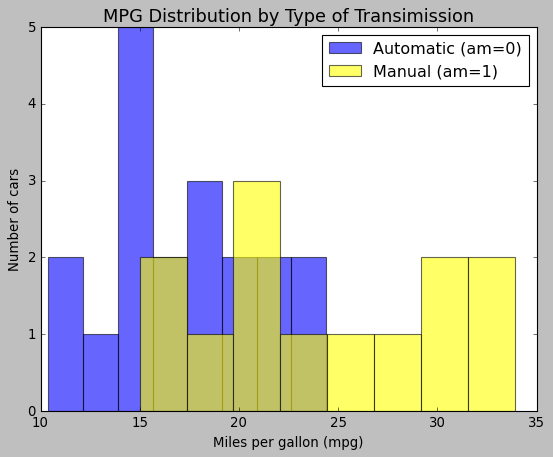

In [114]:
auto = mtcars[mtcars["am"] ==0]["mpg"]
manual = mtcars[mtcars["am"] ==1]["mpg"]


plt.hist(auto, bins=8, alpha=0.6, density =0, label="Automatic (am=0)", color = "blue", edgecolor = "black")
plt.hist(manual, bins=8, alpha=0.6, density =0, label="Manual (am=1)", color = "yellow", edgecolor = "black")

plt.xlabel("Miles per gallon (mpg)")
plt.ylabel("Number of cars")
plt.title("MPG Distribution by Type of Transimission", fontsize = 16)
plt.legend()

plt.savefig("histogram.png")
plt.show()

### 2.) Create a scatter plot showing the relationship between mpg and hp.

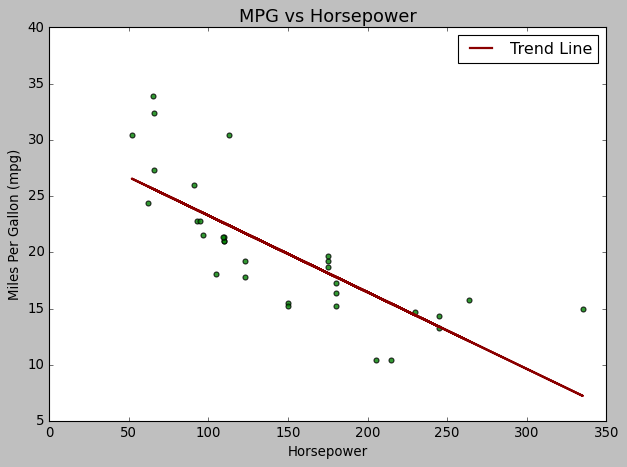

In [115]:
plt.scatter(mtcars["hp"], mtcars["mpg"], color = "green", edgecolor="black", alpha=0.8)
plt.xlabel("Horsepower")
plt.ylabel("Miles Per Gallon (mpg)")
plt.title("MPG vs Horsepower", fontsize=16)


#if we needed to add a regression line: 
m,b =np.polyfit(mtcars["hp"], mtcars["mpg"],1)
plt.plot(
    mtcars["hp"],
    m * mtcars["hp"] + b,
    color = "darkred",
    linewidth=2,
    label="Trend Line"
)
plt.legend()
plt.tight_layout()
plt.show()

### 3.) Create a scatterplot matrix for new data consisting of columns [disp, hp, drat, wt, qsect].

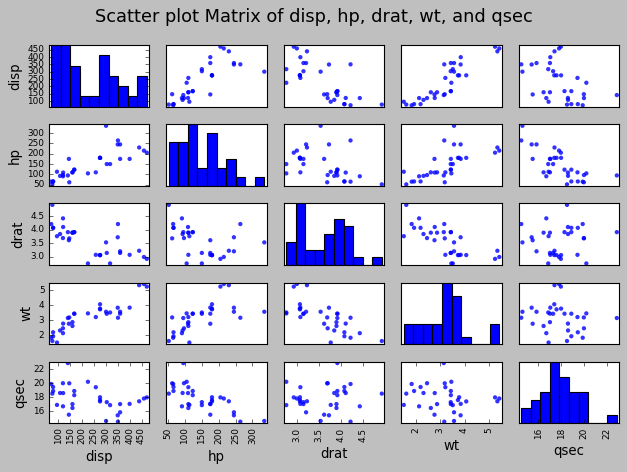

In [116]:
plt.style.use("classic")
scatter_matrix_data = mtcars[["disp","hp","drat","wt","qsec"]]

pd.plotting.scatter_matrix(scatter_matrix_data, s = 60, diagonal ="hist", color = "blue",alpha=0.8)

plt.suptitle("Scatter plot Matrix of disp, hp, drat, wt, and qsec", fontsize=16)
plt.tight_layout()
plt.show()

### 4.) Create boxplots for new data consisting of columns [disp, hp, drat, wt, qsect].

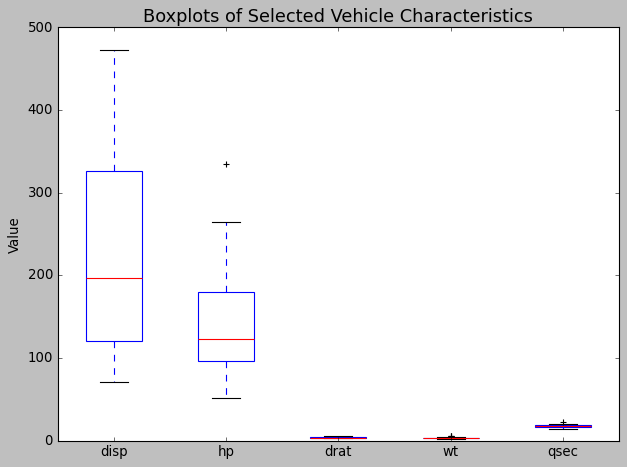

In [123]:
new_data = mtcars[["disp","hp","drat","wt","qsec"]]

plt.boxplot(
    new_data,
    patch_artist=True,
    tick_labels=new_data.columns
)

plt.title("Boxplots of Selected Vehicle Characteristics", fontsize=16)
plt.ylabel("Value")
plt.tight_layout()

### 5.) Which variable has the most impact on mpg? Use both visualizations and quantitative analysis to confirm your conclusion.

The most significant variable contributing to mpg is: wt, with a correlation value of -0.8676593765172276


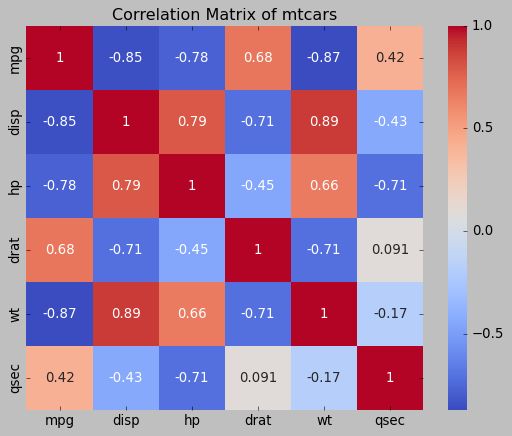

In [118]:
# Quantitative Analysis:
correlation = mtcars[["mpg", "disp","hp","drat","wt","qsec"]].corr()["mpg"].sort_values(ascending=False)
ab_correlation = correlation.abs().sort_values(ascending=False)
# print(ab_correlation)

top_var = ab_correlation.drop("mpg").idxmax()
print(f"The most significant variable contributing to mpg is: {top_var}, with a correlation value of {correlation[top_var]}")
corr_matrix = mtcars[["mpg","disp","hp","drat","wt","qsec"]].corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of mtcars")
plt.show()

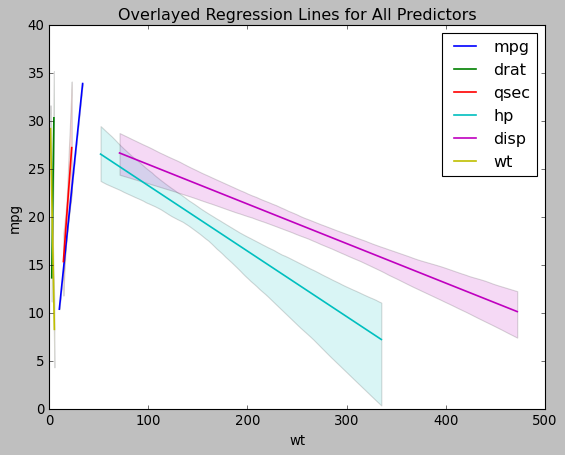

In [119]:
for var in correlation.index:
    #if var != "mpg":     #can remove but a good reference point for a one-to-one relationship
        sns.regplot(
            x=var,
            y="mpg",
            data=mtcars,
            scatter=False,         
            label=var
        )
plt.legend()
plt.title("Overlayed Regression Lines for All Predictors")
plt.show()

From the map, we can see the regression line with the greatest slope is the light green line which is weight. This indicates wt is the variable with the strongest indicator for mpg. 